# Question to be answered:

- Is the accuracy of model/human significantly better? In both force and mass questions?
- Is the distribution of responses significantly different?

In [1]:
import isaac.constants
isaac.constants.TQDM_DISABLE = True

from torch import nn
from isaac.utils import get_cuda_device_if_available
import joblib

from isaac.dataset import read_dataset, prepare_dataset
from isaac.models import MultiBranchModel
from isaac.constants import BASIC_TRAINING_COLS, MASS_CLASS_COLS, FORCE_CLASS_COLS
from isaac.evaluation import evaluate_saved_model
from isaac.statistical_tests import z_test
from isaac.visualization import plot_confusion_matrix

from scipy.stats import ttest_ind, ttest_rel, f_oneway

import torch
import glob
from torch.autograd import Variable
import numpy as np
import pandas as pd
from tqdm import tqdm

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
device = get_cuda_device_if_available()
print(device)

cpu


RTHETA_ATTRS = [obj+"."+attr for obj in ["o1", "o2", "o3", "o4"] for attr in ["x", "y", "r", "theta"]]

def add_r_theta_attributes(trials):
    for trial in tqdm(trials):
        for obj in ["o1", "o2", "o3", "o4"]:
            trial[obj+".r"] = (trial[obj+".vx"]**2 + trial[obj+".vy"]**2)**0.5
            trial[obj+".theta"] = (np.arctan2(trial[obj+".vx"], trial[obj+".vy"]) * 180 / np.pi)

In [3]:
def get_question_accuracy_for_group_of_models(question_type):
    normalise_data = True
    scaler_path = "scalers/passive_dual_scaler.sk"
    network_dims = (len(BASIC_TRAINING_COLS), 25, 3, 0.5)
    dataset_path = "../new_exp_data/exp7_passive.h5"
    class_columns = [list(MASS_CLASS_COLS), list(FORCE_CLASS_COLS)]
    multiclass = True
    seq_end = 2700
    step_size = 3
    
    models = sorted(glob.glob("models/train_25_mb/best_"+question_type+"_model_seed_*.pt"))

    group_accuracy = []
    group_predictions = []
    
    # trials = read_dataset(dataset_path)
    # add_r_theta_attributes(trials)

    for model_path in tqdm(models):
        accuracies, predicted = evaluate_saved_model(model_path, network_dims, dataset_path, 
                                                     training_columns=BASIC_TRAINING_COLS, class_columns=class_columns, 
                                                     step_size=step_size, seq_end=seq_end, scaler_path=scaler_path,
                                                     arch=MultiBranchModel, multiclass=multiclass, trials=None)

        if question_type == "mass":
            accuracy = accuracies[0]
            predicted = predicted[:, 0]
        else:
            accuracy = accuracies[1]
            predicted = predicted[:, 1]

        group_accuracy.append(accuracy)
        group_predictions.append(predicted.numpy())

    return group_accuracy, group_predictions


def get_participant_accuracy_filtering_by_answer(passive_responses, answer_column, question_type_answer, filter_by_class):
    
    passive_responses = passive_responses.copy().query(question_type_answer+" == "+filter_by_class)
    return passive_responses[answer_column]

# T-test for MASS questions

## Load model's predictions

In [4]:
print("MASS")
question_type = "mass"
group_mass_acc, group_mass_prediction = get_question_accuracy_for_group_of_models(question_type)
     
print("\nFORCE")
question_type = "force"
group_force_acc, group_force_prediction = get_question_accuracy_for_group_of_models(question_type)

  0%|          | 0/25 [00:00<?, ?it/s]

MASS


  4%|▍         | 1/25 [00:01<00:24,  1.04s/it]

Model's accuracy on test set: [69.44444444 63.88888889]


  8%|▊         | 2/25 [00:01<00:23,  1.00s/it]

Model's accuracy on test set: [52.77777778 75.        ]


 12%|█▏        | 3/25 [00:02<00:20,  1.05it/s]

Model's accuracy on test set: [50.         72.22222222]


 16%|█▌        | 4/25 [00:03<00:18,  1.11it/s]

Model's accuracy on test set: [69.44444444 63.88888889]


 20%|██        | 5/25 [00:04<00:17,  1.16it/s]

Model's accuracy on test set: [63.88888889 61.11111111]


 24%|██▍       | 6/25 [00:05<00:15,  1.19it/s]

Model's accuracy on test set: [52.77777778 72.22222222]


 28%|██▊       | 7/25 [00:05<00:14,  1.21it/s]

Model's accuracy on test set: [52.77777778 61.11111111]


 32%|███▏      | 8/25 [00:06<00:13,  1.22it/s]

Model's accuracy on test set: [50.         55.55555556]


 36%|███▌      | 9/25 [00:07<00:12,  1.24it/s]

Model's accuracy on test set: [47.22222222 52.77777778]


 40%|████      | 10/25 [00:08<00:12,  1.25it/s]

Model's accuracy on test set: [47.22222222 63.88888889]


 44%|████▍     | 11/25 [00:09<00:11,  1.25it/s]

Model's accuracy on test set: [50.         77.77777778]


 48%|████▊     | 12/25 [00:09<00:10,  1.26it/s]

Model's accuracy on test set: [55.55555556 77.77777778]


 52%|█████▏    | 13/25 [00:10<00:09,  1.27it/s]

Model's accuracy on test set: [58.33333333 52.77777778]


 56%|█████▌    | 14/25 [00:11<00:08,  1.27it/s]

Model's accuracy on test set: [61.11111111 75.        ]


 60%|██████    | 15/25 [00:12<00:07,  1.28it/s]

Model's accuracy on test set: [50.         63.88888889]


 64%|██████▍   | 16/25 [00:12<00:06,  1.29it/s]

Model's accuracy on test set: [55.55555556 61.11111111]


 68%|██████▊   | 17/25 [00:13<00:06,  1.29it/s]

Model's accuracy on test set: [41.66666667 66.66666667]


 72%|███████▏  | 18/25 [00:14<00:05,  1.28it/s]

Model's accuracy on test set: [66.66666667 69.44444444]


 76%|███████▌  | 19/25 [00:15<00:04,  1.27it/s]

Model's accuracy on test set: [50.         55.55555556]


 80%|████████  | 20/25 [00:16<00:03,  1.26it/s]

Model's accuracy on test set: [52.77777778 66.66666667]


 84%|████████▍ | 21/25 [00:16<00:03,  1.26it/s]

Model's accuracy on test set: [41.66666667 72.22222222]


 88%|████████▊ | 22/25 [00:17<00:02,  1.25it/s]

Model's accuracy on test set: [52.77777778 58.33333333]


 92%|█████████▏| 23/25 [00:18<00:01,  1.25it/s]

Model's accuracy on test set: [50.         61.11111111]


 96%|█████████▌| 24/25 [00:19<00:00,  1.25it/s]

Model's accuracy on test set: [41.66666667 58.33333333]


  0%|          | 0/25 [00:00<?, ?it/s]

Model's accuracy on test set: [58.33333333 75.        ]

FORCE


  4%|▍         | 1/25 [00:01<00:24,  1.01s/it]

Model's accuracy on test set: [69.44444444 69.44444444]


  8%|▊         | 2/25 [00:01<00:22,  1.01it/s]

Model's accuracy on test set: [66.66666667 69.44444444]


 12%|█▏        | 3/25 [00:02<00:21,  1.02it/s]

Model's accuracy on test set: [50.         72.22222222]


 16%|█▌        | 4/25 [00:03<00:20,  1.03it/s]

Model's accuracy on test set: [58.33333333 66.66666667]


 20%|██        | 5/25 [00:04<00:18,  1.07it/s]

Model's accuracy on test set: [61.11111111 66.66666667]


 24%|██▍       | 6/25 [00:05<00:17,  1.09it/s]

Model's accuracy on test set: [55.55555556 63.88888889]


 28%|██▊       | 7/25 [00:06<00:15,  1.13it/s]

Model's accuracy on test set: [55.55555556 69.44444444]


 32%|███▏      | 8/25 [00:07<00:14,  1.16it/s]

Model's accuracy on test set: [55.55555556 50.        ]


 36%|███▌      | 9/25 [00:08<00:13,  1.19it/s]

Model's accuracy on test set: [44.44444444 58.33333333]


 40%|████      | 10/25 [00:08<00:12,  1.21it/s]

Model's accuracy on test set: [44.44444444 58.33333333]


 44%|████▍     | 11/25 [00:09<00:11,  1.23it/s]

Model's accuracy on test set: [58.33333333 72.22222222]


 48%|████▊     | 12/25 [00:10<00:10,  1.23it/s]

Model's accuracy on test set: [63.88888889 63.88888889]


 52%|█████▏    | 13/25 [00:11<00:09,  1.22it/s]

Model's accuracy on test set: [55.55555556 61.11111111]


 56%|█████▌    | 14/25 [00:12<00:09,  1.21it/s]

Model's accuracy on test set: [52.77777778 80.55555556]


 60%|██████    | 15/25 [00:13<00:08,  1.16it/s]

Model's accuracy on test set: [61.11111111 61.11111111]


 64%|██████▍   | 16/25 [00:13<00:08,  1.12it/s]

Model's accuracy on test set: [55.55555556 63.88888889]


 68%|██████▊   | 17/25 [00:14<00:07,  1.10it/s]

Model's accuracy on test set: [58.33333333 66.66666667]


 72%|███████▏  | 18/25 [00:15<00:06,  1.12it/s]

Model's accuracy on test set: [66.66666667 69.44444444]


 76%|███████▌  | 19/25 [00:16<00:05,  1.08it/s]

Model's accuracy on test set: [52.77777778 61.11111111]


 80%|████████  | 20/25 [00:17<00:04,  1.03it/s]

Model's accuracy on test set: [52.77777778 66.66666667]


 84%|████████▍ | 21/25 [00:18<00:03,  1.06it/s]

Model's accuracy on test set: [41.66666667 75.        ]


 88%|████████▊ | 22/25 [00:19<00:02,  1.11it/s]

Model's accuracy on test set: [61.11111111 58.33333333]


 92%|█████████▏| 23/25 [00:20<00:01,  1.12it/s]

Model's accuracy on test set: [52.77777778 61.11111111]


 96%|█████████▌| 24/25 [00:21<00:00,  1.15it/s]

Model's accuracy on test set: [44.44444444 61.11111111]


100%|██████████| 25/25 [00:22<00:00,  1.16it/s]

Model's accuracy on test set: [58.33333333 75.        ]


In [5]:
group_mass_prediction = np.array(group_mass_prediction)
group_force_prediction = np.array(group_force_prediction)

In [6]:
answers = []
for question_i in range(group_mass_prediction.shape[1]):
    
    mass_predictions = list(group_mass_prediction[:, question_i])
    question_mass_answers = [(key, mass_predictions.count(key) / 25) for key in range(3)]
    question_mass_counts = [x[1] for x in question_mass_answers]
    
    sorted_mass_answers = sorted(question_mass_answers, key=lambda x: x[1], reverse=True)
    sorted_mass_answers = np.hstack(sorted_mass_answers)
    question_mass_answers = np.concatenate((sorted_mass_answers, question_mass_counts))
        
    force_predictions = list(group_force_prediction[:, question_i])
    question_force_answers = [(key, force_predictions.count(key) / 25) for key in range(3)]
    question_force_counts = [x[1] for x in question_force_answers]
    
    sorted_force_answers = sorted(question_force_answers, key=lambda x: x[1], reverse=True)
    sorted_force_answers = np.hstack(sorted_force_answers)
    question_force_answers = np.concatenate((sorted_force_answers, question_force_counts))
    
    answers.append(np.hstack((question_mass_answers, question_force_answers)))
    

model_answers_df = pd.DataFrame(data=answers, 
                                columns=["models_first_mass_resp", "models_first_mass_count", 
                                         "models_second_mass_resp", "models_second_mass_count",
                                         "models_third_mass_resp", "models_third_mass_count",
                                         "models_chose_A", "models_chose_B", "models_chose_same",
                                         "models_first_rel_resp", "models_first_rel_count", 
                                         "models_second_rel_resp", "models_second_rel_count",
                                         "models_third_rel_resp", "models_third_rel_count",
                                         "models_chose_attract", "models_chose_none", "models_chose_repel",
                                         ])

mass_answer_id_to_str = lambda x: MASS_CLASS_COLS[int(x)]
rel_answer_id_to_str = lambda x: FORCE_CLASS_COLS[int(x)]

model_answers_df.models_first_mass_resp = model_answers_df.models_first_mass_resp.apply(mass_answer_id_to_str)
model_answers_df.models_second_mass_resp = model_answers_df.models_second_mass_resp.apply(mass_answer_id_to_str)
model_answers_df.models_third_mass_resp = model_answers_df.models_third_mass_resp.apply(mass_answer_id_to_str)

model_answers_df.models_first_rel_resp = model_answers_df.models_first_rel_resp.apply(rel_answer_id_to_str)
model_answers_df.models_second_rel_resp = model_answers_df.models_second_rel_resp.apply(rel_answer_id_to_str)
model_answers_df.models_third_rel_resp = model_answers_df.models_third_rel_resp.apply(rel_answer_id_to_str)

In [7]:
model_answers_df.head()

,models_first_mass_resp,models_first_mass_count,models_second_mass_resp,models_second_mass_count,models_third_mass_resp,models_third_mass_count,models_chose_A,models_chose_B,models_chose_same,models_first_rel_resp,models_first_rel_count,models_second_rel_resp,models_second_rel_count,models_third_rel_resp,models_third_rel_count,models_chose_attract,models_chose_none,models_chose_repel
0,A,0.48,same,0.44,B,0.08,0.48,0.08,0.44,attract,0.84,none,0.16,repel,0.00,0.84,0.16,0.00
1,A,0.76,same,0.24,B,0.00,0.76,0.00,0.24,attract,1.00,none,0.00,repel,0.00,1.00,0.00,0.00
2,B,0.96,same,0.04,A,0.00,0.00,0.96,0.04,attract,1.00,none,0.00,repel,0.00,1.00,0.00,0.00
3,same,0.60,A,0.36,B,0.04,0.36,0.04,0.60,none,0.64,repel,0.24,attract,0.12,0.12,0.64,0.24
4,same,0.72,A,0.24,B,0.04,0.24,0.04,0.72,none,0.60,repel,0.40,attract,0.00,0.00,0.60,0.40


model_answers_df.to_hdf("../new_exp_data/rnn_answers_with_counts.h5", key="key")

In [8]:
import json

In [9]:
condition_world_variant = []
world_id = []

for condition_id in range(1, 5):
    filename = "../new_exp_data/physics_data%d.json" % condition_id
    fd = open(filename)
    sim_data = json.load(fd)
    
    for sim in sim_data:
        if sim["practice"]:
            continue
        condition_world_variant.append(sim["condition_world_variant"])
        world_id.append(sim["world_id"])

In [10]:
model_answers_df["condition_world_variant"] = condition_world_variant
model_answers_df["world_id"] = world_id

In [11]:
model_answers_df.head()

,models_first_mass_resp,models_first_mass_count,models_second_mass_resp,models_second_mass_count,models_third_mass_resp,models_third_mass_count,models_chose_A,models_chose_B,models_chose_same,models_first_rel_resp,models_first_rel_count,models_second_rel_resp,models_second_rel_count,models_third_rel_resp,models_third_rel_count,models_chose_attract,models_chose_none,models_chose_repel,condition_world_variant,world_id
0,A,0.48,same,0.44,B,0.08,0.48,0.08,0.44,attract,0.84,none,0.16,repel,0.00,0.84,0.16,0.00,1,481
1,A,0.76,same,0.24,B,0.00,0.76,0.00,0.24,attract,1.00,none,0.00,repel,0.00,1.00,0.00,0.00,1,856
2,B,0.96,same,0.04,A,0.00,0.00,0.96,0.04,attract,1.00,none,0.00,repel,0.00,1.00,0.00,0.00,1,1819
3,same,0.60,A,0.36,B,0.04,0.36,0.04,0.60,none,0.64,repel,0.24,attract,0.12,0.12,0.64,0.24,1,566
4,same,0.72,A,0.24,B,0.04,0.24,0.04,0.72,none,0.60,repel,0.40,attract,0.00,0.00,0.60,0.40,1,821


## Load human results

In [12]:
from rpy2.robjects import r, pandas2ri
pandas2ri.activate()

In [13]:
rdata_path = "../new_exp_data/e7_passive_io_rtheta.rdata"
r['load'](rdata_path)

responses = r["tw"].query("practice == 0")

# Percentage of participants that get an answer right

In [14]:
passive_responses = []

for name, df in responses.groupby(["cond_worldvar", "world_id", "true_mass", "true_rel", "post_ent_mass.rtheta", "post_ent_rel.rtheta"]):
    response = [name[0], name[1], name[2], name[3], name[4], name[5]]

    value_counts = df.resp_rel.value_counts().sort_index().sort_values(ascending=False)
    for i in range(len(value_counts)):
        answer = value_counts.index[i]
        response.append(answer)
        if answer == name[3]:
            got_it_right = value_counts[i]
            
    response.append(got_it_right / value_counts.sum())
    response.append(value_counts["attract"] / value_counts.sum())
    response.append(value_counts["none"] / value_counts.sum())
    response.append(value_counts["repel"] / value_counts.sum())
    
    value_counts = df.resp_mass.value_counts().sort_index().sort_values(ascending=False)
    
    for i in range(len(value_counts)):
        answer = value_counts.index[i]
        response.append(answer)
        if answer == name[2]:
            got_it_right = value_counts[i]
            
    response.append(got_it_right / value_counts.sum())
    response.append(value_counts["A"] / value_counts.sum())
    response.append(value_counts["B"] / value_counts.sum())
    response.append(value_counts["same"] / value_counts.sum())    
        
    passive_responses.append(response)

In [15]:
passive_responses = pd.DataFrame(data=passive_responses, 
                                 columns=["cond_worldvar", "world_id", "true_mass", "true_rel",  "post_ent_mass.rtheta", "post_ent_rel.rtheta",
                                          "humans_first_resp_rel", "humans_second_resp_rel", "humans_third_resp_rel", 
                                          "got_rel_right", "humans_chose_attract", "humans_chose_none", "humans_chose_repel",
                                          "humans_first_resp_mass", "humans_second_resp_mass", "humans_third_resp_mass",
                                          "got_mass_right", "humans_chose_A", "humans_chose_B", "humans_chose_same"])

In [16]:
passive_responses.head()

,cond_worldvar,world_id,true_mass,true_rel,post_ent_mass.rtheta,post_ent_rel.rtheta,humans_first_resp_rel,humans_second_resp_rel,humans_third_resp_rel,got_rel_right,humans_chose_attract,humans_chose_none,humans_chose_repel,humans_first_resp_mass,humans_second_resp_mass,humans_third_resp_mass,got_mass_right,humans_chose_A,humans_chose_B,humans_chose_same
0,1,1218,A,repel,0.000827,1.402287,repel,attract,none,0.76,0.16,0.08,0.76,A,same,B,0.52,0.52,0.20,0.28
1,1,1736,B,none,0.022527,1.413136,repel,none,attract,0.40,0.08,0.40,0.52,B,same,A,0.52,0.16,0.52,0.32
2,1,1758,B,repel,0.049913,1.555458,repel,attract,none,0.44,0.32,0.24,0.44,B,same,A,0.72,0.04,0.72,0.24
3,1,1819,B,attract,0.243940,0.924914,attract,repel,none,0.64,0.64,0.04,0.32,B,same,A,0.60,0.20,0.60,0.20
4,1,438,same,repel,0.051500,1.305047,repel,none,attract,0.56,0.16,0.28,0.56,same,B,A,0.36,0.28,0.36,0.36


In [17]:
passive_responses["cond_worldvar"] = passive_responses["cond_worldvar"].astype("int64")
passive_responses["world_id"] = passive_responses["world_id"].astype("int64")

passive_responses = passive_responses.merge(model_answers_df, left_on=["cond_worldvar", "world_id"], right_on=["condition_world_variant", "world_id"])

# Percentage of models that get an answer right

In [18]:
models_that_got_mass_question_right = []

for i, answer in enumerate(passive_responses.true_mass):
    if passive_responses.models_first_mass_resp.iloc[i] == answer:
        models_that_got_mass_question_right.append(passive_responses.models_first_mass_count.iloc[i])
    elif passive_responses.models_second_mass_resp.iloc[i] == answer:
        models_that_got_mass_question_right.append(passive_responses.models_second_mass_count.iloc[i])
    elif passive_responses.models_third_mass_resp.iloc[i] == answer:
        models_that_got_mass_question_right.append(passive_responses.models_third_mass_count.iloc[i])

        
models_that_got_rel_question_right = []
        
for i, answer in enumerate(passive_responses.true_rel):
    if passive_responses.models_first_rel_resp.iloc[i] == answer:
        models_that_got_rel_question_right.append(passive_responses.models_first_rel_count.iloc[i])
    elif passive_responses.models_second_rel_resp.iloc[i] == answer:
        models_that_got_rel_question_right.append(passive_responses.models_second_rel_count.iloc[i])
    elif passive_responses.models_third_rel_resp.iloc[i] == answer:
        models_that_got_rel_question_right.append(passive_responses.models_third_rel_count.iloc[i])
        

passive_responses["models_got_mass_right"] = np.array(models_that_got_mass_question_right)
passive_responses["models_got_rel_right"] = np.array(models_that_got_rel_question_right)

In [19]:
passive_responses.columns

Index(['cond_worldvar', 'world_id', 'true_mass', 'true_rel',
       'post_ent_mass.rtheta', 'post_ent_rel.rtheta', 'humans_first_resp_rel',
       'humans_second_resp_rel', 'humans_third_resp_rel', 'got_rel_right',
       'humans_chose_attract', 'humans_chose_none', 'humans_chose_repel',
       'humans_first_resp_mass', 'humans_second_resp_mass',
       'humans_third_resp_mass', 'got_mass_right', 'humans_chose_A',
       'humans_chose_B', 'humans_chose_same', 'models_first_mass_resp',
       'models_first_mass_count', 'models_second_mass_resp',
       'models_second_mass_count', 'models_third_mass_resp',
       'models_third_mass_count', 'models_chose_A', 'models_chose_B',
       'models_chose_same', 'models_first_rel_resp', 'models_first_rel_count',
       'models_second_rel_resp', 'models_second_rel_count',
       'models_third_rel_resp', 'models_third_rel_count',
       'models_chose_attract', 'models_chose_none', 'models_chose_repel',
       'condition_world_variant', 'models_got_m

In [20]:
passive_responses["model_mass"] = passive_responses["models_first_mass_resp"]
passive_responses["model_relationship"] = passive_responses["models_first_rel_resp"]

In [21]:
human_mass_accuracy_list = passive_responses.got_mass_right
human_force_accuracy_list = passive_responses.got_rel_right

model_mass_accuracy_list = passive_responses.models_got_mass_right
model_force_accuracy_list = passive_responses.models_got_rel_right

# Perform t-test on overall accuracy

In [22]:
print(np.mean(human_mass_accuracy_list), "±", np.std(human_mass_accuracy_list))
print(np.mean(model_mass_accuracy_list), "±", np.std(model_mass_accuracy_list))

0.37839031339031337 ± 0.145973580677441
0.5366666666666666 ± 0.2839992175263086


In [23]:
print(np.mean(human_force_accuracy_list), "±", np.std(human_force_accuracy_list))
print(np.mean(model_force_accuracy_list), "±", np.std(model_force_accuracy_list))

0.5462250712250714 ± 0.176816239172785
0.6566666666666667 ± 0.21320308523929843


#### Is the model significantly better answering mass questions than humans?

In [24]:
ttest_rel(human_mass_accuracy_list, model_mass_accuracy_list)

Ttest_relResult(statistic=-3.6873191331691264, pvalue=0.000763240022957818)

#### Is the model significantly better answering force questions than humans?

In [25]:
ttest_rel(human_force_accuracy_list, model_force_accuracy_list)

Ttest_relResult(statistic=-2.364560857365549, pvalue=0.023727816753575937)

#### Is the model significantly better answering force questions than mass questions? And humans?

In [26]:
print(ttest_ind(model_mass_accuracy_list, model_force_accuracy_list))
print(ttest_ind(human_mass_accuracy_list, human_force_accuracy_list))

Ttest_indResult(statistic=-1.9991187485802633, pvalue=0.049479134569990736)
Ttest_indResult(statistic=-4.3304952743613745, pvalue=4.86608749152777e-05)


# Is the model better at predicting any force class?

In [27]:
repel_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_rel_right", 
                                                                   "true_rel", "'repel'")

none_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_rel_right", 
                                                                   "true_rel", "'none'")

attract_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_rel_right", 
                                                                   "true_rel", "'attract'")

In [28]:
print(np.mean(repel_accuracy_list), np.std(repel_accuracy_list))
print(np.mean(none_accuracy_list), np.std(none_accuracy_list))
print(np.mean(attract_accuracy_list), np.std(attract_accuracy_list))

print()

print(ttest_ind(repel_accuracy_list, none_accuracy_list))
print(ttest_ind(repel_accuracy_list, attract_accuracy_list))
print(ttest_ind(attract_accuracy_list, none_accuracy_list))

0.5233333333333333 0.21507104769251384
0.6566666666666666 0.13211947455070944
0.79 0.19261360284258222

Ttest_indResult(statistic=-1.7519733256128291, pvalue=0.09370781302830289)
Ttest_indResult(statistic=-3.0633583242699354, pvalue=0.005691672124483616)
Ttest_indResult(statistic=1.8932832289250123, pvalue=0.0715480390565109)


# Are humans better at predicting any force class? And compared to RNNs?

In [29]:
human_repel_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_rel_right", 
                                                                         "true_rel", "'repel'")

human_none_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_rel_right", 
                                                                        "true_rel", "'none'")

human_attract_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_rel_right", 
                                                                   "true_rel", "'attract'")

print(np.mean(human_repel_accuracy_list), np.std(human_repel_accuracy_list))
print(np.mean(human_none_accuracy_list), np.std(human_none_accuracy_list))
print(np.mean(human_attract_accuracy_list), np.std(human_attract_accuracy_list))


print()

print(ttest_ind(human_repel_accuracy_list, human_none_accuracy_list))
print(ttest_ind(human_repel_accuracy_list, human_attract_accuracy_list))
print(ttest_ind(human_attract_accuracy_list, human_none_accuracy_list))

0.5727350427350427 0.13531888148325485
0.38777777777777783 0.10039803172690473
0.6781623931623932 0.14894697893841963

Ttest_indResult(statistic=3.640639395027706, pvalue=0.0014428896714880582)
Ttest_indResult(statistic=-1.7375664164447775, pvalue=0.09626821719795242)
Ttest_indResult(statistic=5.361722481943239, pvalue=2.204329106568638e-05)


In [30]:
print(ttest_rel(repel_accuracy_list, human_repel_accuracy_list))
print(ttest_rel(none_accuracy_list, human_none_accuracy_list))
print(ttest_rel(attract_accuracy_list, human_attract_accuracy_list))

Ttest_relResult(statistic=-0.5291850077677979, pvalue=0.607190819213975)
Ttest_relResult(statistic=4.788593129525713, pvalue=0.0005635761649337808)
Ttest_relResult(statistic=1.695568588698561, pvalue=0.11805184220926189)


# Is the model better at predicting any mass class?

In [31]:
a_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_mass_right", 
                                                                   "true_mass", "'A'")

same_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_mass_right", 
                                                                   "true_mass", "'same'")

b_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "models_got_mass_right", 
                                                                   "true_mass", "'B'")

In [32]:
print(np.mean(a_accuracy_list), np.std(a_accuracy_list))
print(np.mean(same_accuracy_list), np.std(same_accuracy_list))
print(np.mean(b_accuracy_list), np.std(b_accuracy_list))

print()

print(ttest_ind(a_accuracy_list, same_accuracy_list))
print(ttest_ind(a_accuracy_list, b_accuracy_list))
print(ttest_ind(b_accuracy_list, same_accuracy_list))

0.5166666666666667 0.29141417642630607
0.39333333333333337 0.2208066021557226
0.7000000000000001 0.24630604269214884

Ttest_indResult(statistic=1.118786463923166, pvalue=0.27529874421091305)
Ttest_indResult(statistic=-1.5935792331068999, pvalue=0.12529739565212536)
Ttest_indResult(statistic=3.074752405610619, pvalue=0.005542451189118525)


# Are humans better at predicting any mass class? And compared to RNNs?

In [33]:
human_a_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_mass_right", 
                                                                     "true_mass", "'A'")

human_same_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_mass_right", 
                                                                        "true_mass", "'same'")

human_b_accuracy_list = get_participant_accuracy_filtering_by_answer(passive_responses, "got_mass_right", 
                                                                     "true_mass", "'B'")

print(np.mean(human_a_accuracy_list), np.std(human_a_accuracy_list))
print(np.mean(human_same_accuracy_list), np.std(human_same_accuracy_list))
print(np.mean(human_b_accuracy_list), np.std(human_b_accuracy_list))

print()

print()

print(ttest_ind(human_a_accuracy_list, human_same_accuracy_list))
print(ttest_ind(human_a_accuracy_list, human_b_accuracy_list))
print(ttest_ind(human_b_accuracy_list, human_same_accuracy_list))

0.4100427350427351 0.14185875067409623
0.30391025641025643 0.11751739115262044
0.42121794871794865 0.14699406576210686


Ttest_indResult(statistic=1.9108454864102784, pvalue=0.0691424586904233)
Ttest_indResult(statistic=-0.1814353668752333, pvalue=0.8576870862868097)
Ttest_indResult(statistic=2.0673466990693723, pvalue=0.050664413609717754)


In [34]:
print(ttest_rel(a_accuracy_list, human_a_accuracy_list))
print(ttest_rel(same_accuracy_list, human_same_accuracy_list))
print(ttest_rel(b_accuracy_list, human_b_accuracy_list))

Ttest_relResult(statistic=1.1748586914436814, pvalue=0.2648568286198724)
Ttest_relResult(statistic=1.4025056601341677, pvalue=0.18835103389704)
Ttest_relResult(statistic=4.85866796379548, pvalue=0.0005037380051173388)


# Do model's correct answers correspond to examples that a higher percentage of humans guess?

In [35]:
passive_responses["model_mass_correct_guesses"] = (passive_responses["model_mass"] == passive_responses["true_mass"])
passive_responses["model_force_correct_guesses"] = (passive_responses["model_relationship"] == passive_responses["true_rel"])

In [36]:
passive_responses["corRel"] = (passive_responses["humans_first_resp_rel"] == passive_responses["true_rel"])
passive_responses["corMass"] = (passive_responses["humans_first_resp_mass"] == passive_responses["true_mass"])

In [37]:
mass_coincidence = (passive_responses["humans_first_resp_mass"] == passive_responses["model_mass"]).mean()
force_coincidence = (passive_responses["humans_first_resp_rel"] == passive_responses["model_relationship"]).mean()

print(mass_coincidence)
print(force_coincidence)

# FLAG

0.5277777777777778
0.6111111111111112


### Mass responses

In [38]:
post_mass_correct_guesses = passive_responses.query("model_mass_correct_guesses")["got_mass_right"]
post_mass_wrong_guesses = passive_responses.query("not model_mass_correct_guesses")["got_mass_right"]

f_oneway(post_mass_correct_guesses, post_mass_wrong_guesses)

F_onewayResult(statistic=4.659555307287202, pvalue=0.03802985826378633)

In [39]:
len(post_mass_correct_guesses), len(post_mass_wrong_guesses)

(20, 16)

### Force responses

In [40]:
post_force_correct_guesses = passive_responses.query("model_force_correct_guesses")['got_rel_right']
post_force_wrong_guesses = passive_responses.query("not model_force_correct_guesses")['got_rel_right']

f_oneway(post_force_correct_guesses, post_force_wrong_guesses)

F_onewayResult(statistic=1.1022776604149753, pvalue=0.3011724606372818)

In [41]:
len(post_force_correct_guesses), len(post_force_wrong_guesses)

(29, 7)

# Are %RNNs and %participants getting a question correct correlated?

In [42]:
passive_responses.head()

,cond_worldvar,world_id,true_mass,true_rel,post_ent_mass.rtheta,post_ent_rel.rtheta,humans_first_resp_rel,humans_second_resp_rel,humans_third_resp_rel,got_rel_right,...,models_chose_repel,condition_world_variant,models_got_mass_right,models_got_rel_right,model_mass,model_relationship,model_mass_correct_guesses,model_force_correct_guesses,corRel,corMass
0,1,1218,A,repel,0.000827,1.402287,repel,attract,none,0.76,...,0.16,1,0.88,0.16,A,none,True,False,True,True
1,1,1736,B,none,0.022527,1.413136,repel,none,attract,0.40,...,0.16,1,1.00,0.80,B,none,True,True,False,True
2,1,1758,B,repel,0.049913,1.555458,repel,attract,none,0.44,...,0.68,1,0.92,0.68,B,repel,True,True,True,True
3,1,1819,B,attract,0.243940,0.924914,attract,repel,none,0.64,...,0.00,1,0.96,1.00,B,attract,True,True,True,True
4,1,438,same,repel,0.051500,1.305047,repel,none,attract,0.56,...,0.56,1,0.64,0.56,same,repel,True,True,True,True


In [43]:
import matplotlib.pyplot as plt

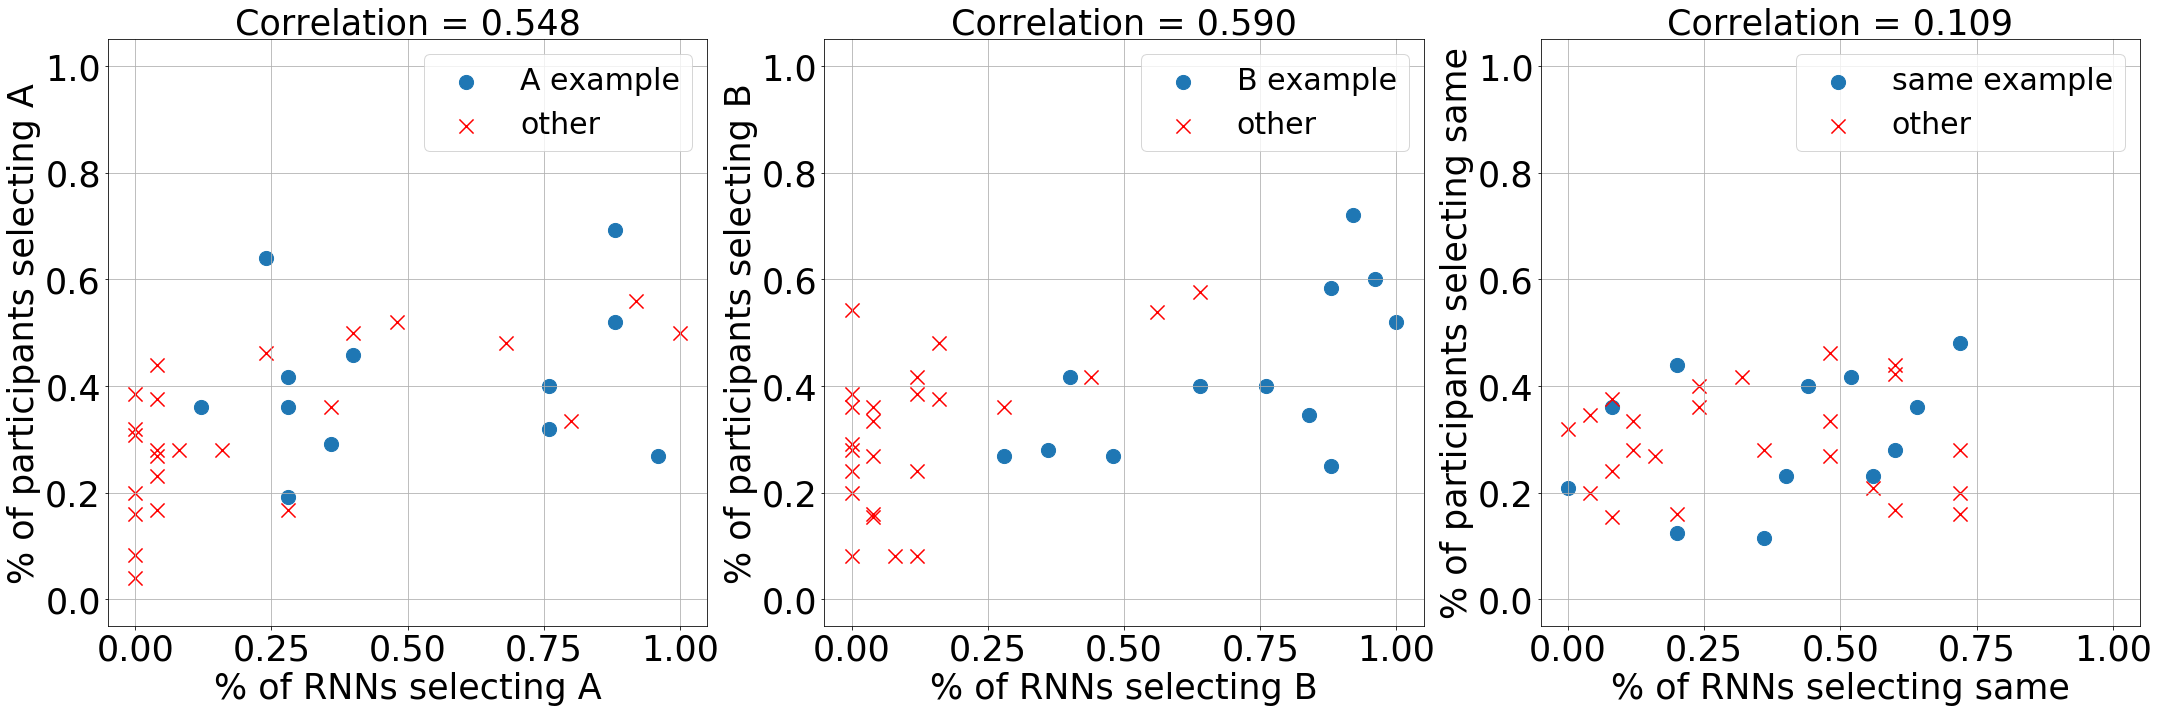

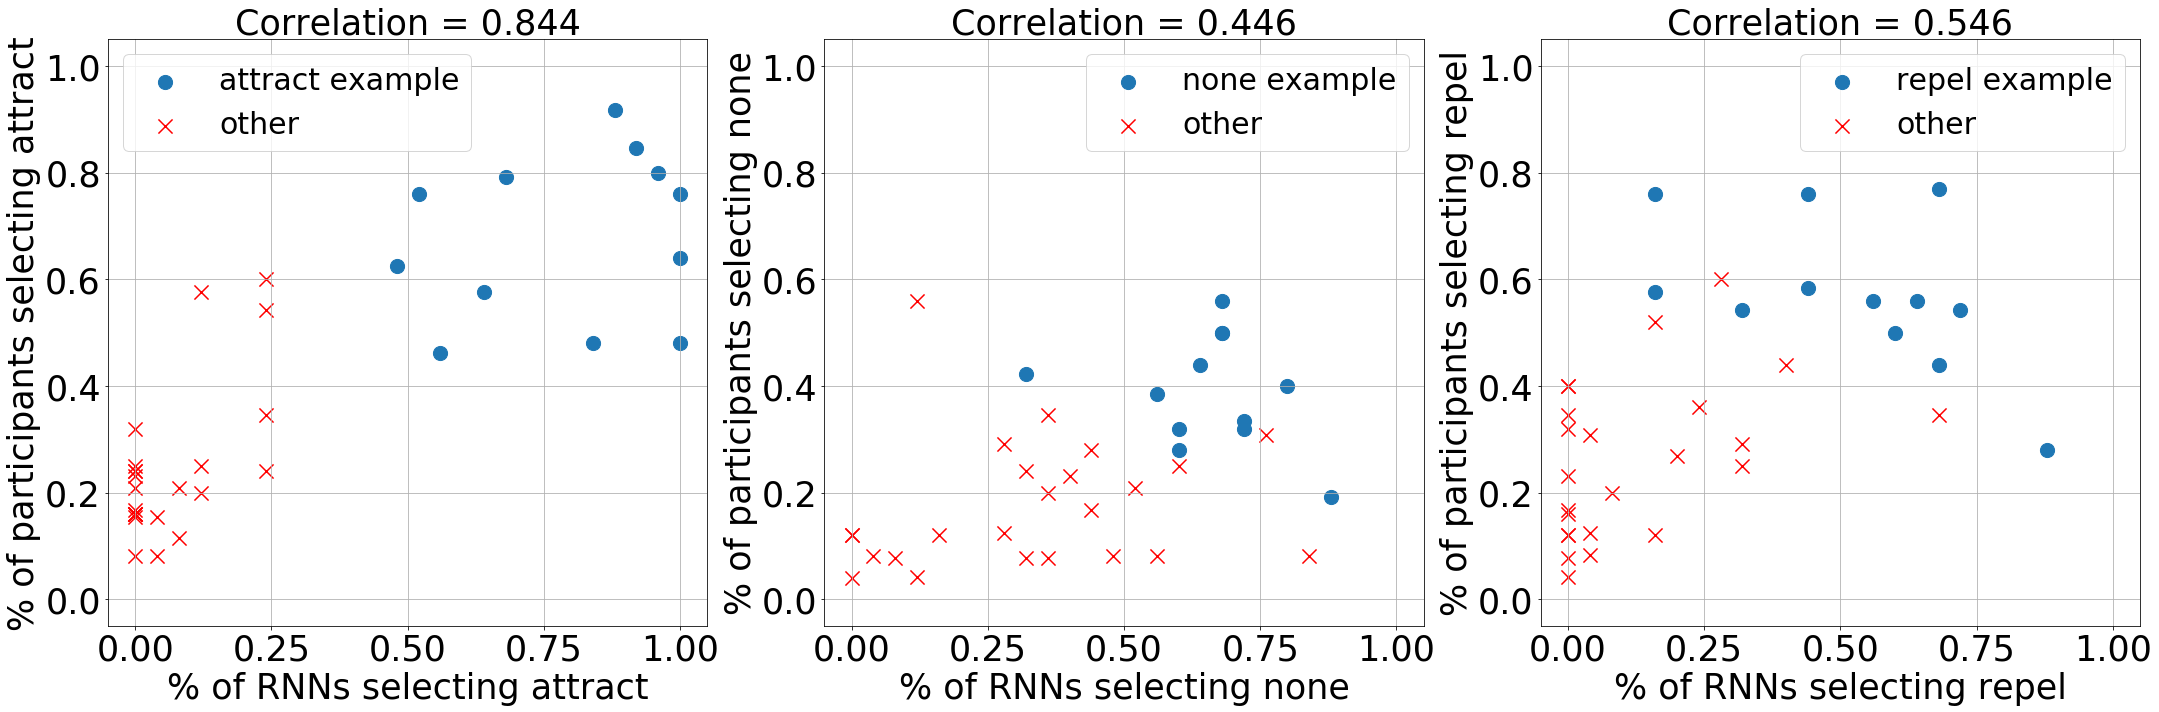

In [55]:
def plot_correlation(class_columns, true_class):
    
    f, axes = plt.subplots(1, 3, figsize=(30, 10))
    c = ["r", "y", "b"]
    
    for i, cl in enumerate(class_columns):
        corr_coef = np.corrcoef(passive_responses["humans_chose_"+cl], passive_responses["models_chose_"+cl])[0][1]        
        is_example_correct = (passive_responses[true_class] == cl)
        
        passive_responses[is_example_correct].plot(kind="scatter", x="models_chose_"+cl, y="humans_chose_"+cl, 
                                                   marker="o", ax=axes[i], label=cl+" example", s=200)
        passive_responses[~is_example_correct].plot(kind="scatter", x="models_chose_"+cl, y="humans_chose_"+cl, c="r", 
                                                    marker="x", ax=axes[i], label="other", s=200)

        axes[i].set_title("Correlation = %.3f" % corr_coef, fontsize=35)
        axes[i].set_xlabel("% of RNNs selecting "+cl, fontsize=35)
        axes[i].set_ylabel("% of participants selecting "+cl, fontsize=35)
        axes[i].legend(fontsize=30)
        axes[i].set_xlim((-0.05, 1.05))
        axes[i].set_ylim((-0.05, 1.05))
        axes[i].tick_params(axis='both', which='major', labelsize=35)
        axes[i].grid()

    plt.tight_layout()
    plt.savefig("cogsci_images/"+true_class.split("_")[1]+"_percentages_correlation.pdf")

plot_correlation(MASS_CLASS_COLS, "true_mass")
plot_correlation(FORCE_CLASS_COLS, "true_rel")

print(np.corrcoef(passive_responses.models_got_mass_right, passive_responses.got_mass_right)[0][1])
passive_responses.plot(kind="scatter", x="models_got_mass_right", y="got_mass_right")

print(np.corrcoef(passive_responses.models_got_rel_right, passive_responses.got_rel_right)[0][1])
passive_responses.plot(kind="scatter", x="models_got_rel_right", y="got_rel_right")

# CONFUSION MATRICES

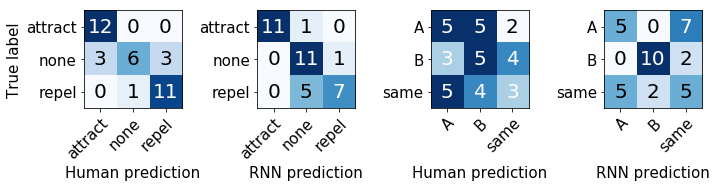

In [45]:
fig, axis = plt.subplots(1, 4, figsize=(10, 5))

ax = plot_confusion_matrix(passive_responses.true_rel, passive_responses.humans_first_resp_rel, FORCE_CLASS_COLS, ax=axis[0])
ax.set_xlabel("Human prediction", fontsize=15)
ax.set_ylabel("True label", fontsize=15)
ax.tick_params(axis="both", labelsize=15)

ax = plot_confusion_matrix(passive_responses.true_rel, passive_responses.models_first_rel_resp, FORCE_CLASS_COLS, ax=axis[1])
ax.set_ylabel("", fontsize=15)
ax.set_xlabel("RNN prediction", fontsize=15)
ax.tick_params(axis="both", labelsize=15)

ax = plot_confusion_matrix(passive_responses.true_mass, passive_responses.humans_first_resp_mass, MASS_CLASS_COLS, ax=axis[2])
ax.set_ylabel("", fontsize=15)
ax.set_xlabel("Human prediction", fontsize=15)
ax.tick_params(axis="both", labelsize=15)

ax = plot_confusion_matrix(passive_responses.true_mass, passive_responses.models_first_mass_resp, MASS_CLASS_COLS, ax=axis[3])
ax.set_ylabel("", fontsize=15)
ax.set_xlabel("RNN prediction", fontsize=15)
ax.tick_params(axis="both", labelsize=15)

f = ax.get_figure()
f.tight_layout()
f.align_labels()
f.savefig("cogsci_images/confusion_matrices.pdf", bbox_inches="tight")

# Are correct guesses / errors correlated between humans and model?

In [46]:
from scipy.stats import chisquare

In [47]:
def test_for_independence(first_answers, second_answers):
    both_correct = (first_answers & second_answers).sum()
    both_wrong = (~first_answers & ~second_answers).sum()
    first_correct_second_wrong = (first_answers & ~second_answers).sum()
    first_wrong_second_correct = (~first_answers & second_answers).sum()
    matrix = np.array([[both_correct, first_correct_second_wrong], [first_wrong_second_correct, both_wrong]])
    
    accuracy_first = first_answers.sum() / len(first_answers)
    accuracy_sec = second_answers.sum() / len(second_answers)
    total_answers = len(first_answers)
    
    
    expected_first = np.array([[accuracy_first/2, accuracy_first/2], [(1 - accuracy_first)/2, (1 - accuracy_first)/2]])
    expected_sec = np.array([[accuracy_sec/2, (1 - accuracy_sec)/2], [accuracy_sec/2, (1 - accuracy_sec)/2]])
    expected = expected_first * expected_sec
    expected /= np.sum(expected)
    expected *= total_answers
    
    chisquare_results = chisquare(matrix, expected, axis=None)
    print("Expected")
    print(expected)
    print("Reality")
    print(matrix)
    return chisquare_results

In [48]:
test_for_independence(passive_responses["corRel"], passive_responses["model_force_correct_guesses"])

Expected
[[23.36111111  5.63888889]
 [ 5.63888889  1.36111111]]
Reality
[[22  7]
 [ 7  0]]


Power_divergenceResult(statistic=2.097502972651607, pvalue=0.5524180941443271)

In [49]:
test_for_independence(passive_responses["corMass"], passive_responses["model_mass_correct_guesses"])
#FLAG

Expected
[[ 7.22222222  5.77777778]
 [12.77777778 10.22222222]]
Reality
[[11  2]
 [ 9 14]]


Power_divergenceResult(statistic=6.959197324414716, pvalue=0.07320972635128)

In [50]:
def test_for_coincidence(first_answers, second_answers, true_answers):
    
    matrix = []
    all_classes = sorted(first_answers.unique())
    
    for class_name in all_classes:
        this_class_coincidences = []
        for second_class_name in all_classes:
            n_coincidences = ((first_answers == class_name) & (second_answers == second_class_name)).sum()
            this_class_coincidences.append(n_coincidences)
            
        matrix.append(this_class_coincidences)
    
    matrix = np.array(matrix)
    
    expected = []    
    for class_name in all_classes:
        this_class_prob = []
        for second_class_name in all_classes:
            prob = 0
            for true_class in all_classes:
                # p_humans(first_class\true_class) * p_rnn(first_class\true_class)
                class_examples = (true_answers == true_class).sum()
                
                p_class = class_examples / len(first_answers)
                p_first_given_class = ((first_answers == class_name) & (true_answers == true_class)).sum() / class_examples
                p_second_given_class = ((second_answers == second_class_name) & (true_answers == true_class)).sum() / class_examples
                val = p_class * p_first_given_class * p_second_given_class
                
                prob += val

            this_class_prob.append(prob)
        expected.append(this_class_prob)
    expected = np.array(expected) 
    expected /= np.sum(expected)
    expected *= len(first_answers)
    print("Expected:")
    print(all_classes)
    print(expected)
    print()
    print("Reality:")
    print(all_classes)
    print(matrix)
    chisquare_results = chisquare(matrix, expected, axis=None)
    
    return chisquare_results

In [51]:
test_for_coincidence(passive_responses["humans_first_resp_rel"], passive_responses["model_relationship"], passive_responses["true_rel"])

Expected:
['attract', 'none', 'repel']
[[11.          3.75        0.25      ]
 [ 0.          5.91666667  1.08333333]
 [ 0.          7.33333333  6.66666667]]

Reality:
['attract', 'none', 'repel']
[[11  4  0]
 [ 0  5  2]
 [ 0  8  6]]


Power_divergenceResult(statistic=nan, pvalue=nan)

In [52]:
test_for_coincidence(passive_responses["humans_first_resp_mass"], passive_responses["model_mass"], passive_responses["true_mass"])
# FLAG

Expected:
['A', 'B', 'same']
[[4.16666667 3.33333333 5.5       ]
 [3.75       4.83333333 5.41666667]
 [2.08333333 3.83333333 3.08333333]]

Reality:
['A', 'B', 'same']
[[7 2 4]
 [2 7 5]
 [1 3 5]]


Power_divergenceResult(statistic=6.625007420689579, pvalue=0.5775775702624837)

# Are correct guesses / errors correlated to informativeness?

### Mass responses

In [53]:
print(np.corrcoef(passive_responses["post_ent_mass.rtheta"], passive_responses["got_mass_right"]))
print(np.corrcoef(passive_responses["post_ent_rel.rtheta"], passive_responses["got_rel_right"]))

[[ 1.         -0.00779539]
 [-0.00779539  1.        ]]
[[ 1.         -0.19292631]
 [-0.19292631  1.        ]]


In [54]:
print(np.corrcoef(passive_responses["models_got_mass_right"], passive_responses["got_mass_right"]))
print(np.corrcoef(passive_responses["models_got_rel_right"], passive_responses["got_rel_right"]))

[[1.         0.45199166]
 [0.45199166 1.        ]]
[[1.         0.00484687]
 [0.00484687 1.        ]]


post_mass_correct_guesses = not_na_passive_responses.query("corMass == 1")["post_ent_mass.rtheta"]
post_mass_wrong_guesses = not_na_passive_responses.query("corMass == 0")["post_ent_mass.rtheta"]

f_oneway(post_mass_correct_guesses, post_mass_wrong_guesses)

### Force responses

post_force_correct_guesses = not_na_passive_responses[not_na_passive_responses.model_force_correct_guesses]['post_ent_rel.rtheta']
post_force_wrong_guesses = not_na_passive_responses[~not_na_passive_responses.model_force_correct_guesses]['post_ent_rel.rtheta']

f_oneway(post_force_correct_guesses, post_force_wrong_guesses)

post_force_correct_guesses = not_na_passive_responses[(not_na_passive_responses.corRel).astype(bool)]['post_ent_rel.rtheta']
post_force_wrong_guesses = not_na_passive_responses[~(not_na_passive_responses.corRel).astype(bool)]['post_ent_rel.rtheta']

f_oneway(post_force_correct_guesses, post_force_wrong_guesses)

### What percentage of the time does the model match the most common participant answer? second most common? and third?
print((passive_responses["model_mass"] == passive_responses["resp_mass"]).sum() / len(passive_responses))
print((passive_responses["model_mass"] == passive_responses["second_resp_mass"]).sum() / len(passive_responses))
print((passive_responses["model_mass"] == passive_responses["third_resp_mass"]).sum() / len(passive_responses))
print()
print((passive_responses["model_relationship"] == passive_responses["resp_rel"]).sum() / len(passive_responses))
print((passive_responses["model_relationship"] == passive_responses["second_resp_rel"]).sum() / len(passive_responses))
print((passive_responses["model_relationship"] == passive_responses["third_resp_rel"]).sum() / len(passive_responses))